# **INTRODUCTION**




### **Project Overview**

The primary objective of this research is to analyze how major global stock market indices influence the behavior of India's Nifty 50 index. In today's globalized financial landscape, markets are interconnected through various channels including capital flows, investor sentiment, and macroeconomic factors. This study aims to quantify these relationships and provide insights into how global market trends are reflected in the Nifty 50's movements.



### **Research Significance**

Understanding the interdependencies between global indices and the Nifty 50 is valuable for several reasons. It enhances our comprehension of market dynamics, aids in developing sophisticated forecasting models, and provides practical applications for quantitative finance and trading strategies.


### **LSTM : Long-Short Term Memory**

LSTM networks are a type of Recurrent Neural Network (RNN) designed to address the limitations of traditional RNNs in capturing long-term dependencies. The core innovation of LSTMs lies in their unique architecture, which includes a memory cell and multiple gating mechanisms. These components work together to regulate the flow of information over extended periods, enabling the network to learn and remember patterns across many time steps.


At the heart of an LSTM is the LSTM unit, which consists of several key elements: the cell state, the forget gate, the input gate, and the output gate. The cell state acts as the backbone of the network, running through the entire sequence and allowing information to be preserved or forgotten over time. The forget gate determines which information from the previous cell state should be discarded. It takes the previous hidden state and the current input, processes them through a sigmoid function, and produces a value between 0 and 1 for each element in the cell state. A value close to 0 means the information should be forgotten, while a value close to 1 means it should be retained.

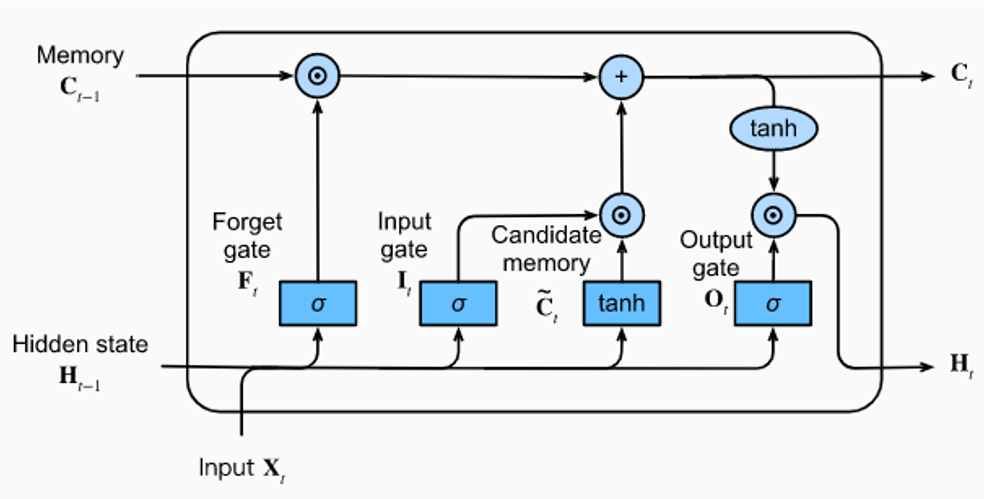

The input gate controls which new information should be stored in the cell state. It comprises two parts: a sigmoid function that decides which values to update and a tanh function that generates new candidate values for the cell state. The sigmoid function produces an update vector, and the tanh function creates a vector of new candidate values. These two vectors are multiplied element-wise to update the cell state. The updated cell state is then calculated by multiplying the previous cell state with the forget gate output and adding the result of the input gate's update vector multiplied by the new candidate values.

Finally, the output gate determines which information from the cell state should be used as the output. It takes the previous hidden state and the current input, processes them through a sigmoid function, and produces an output gate vector. This vector is multiplied element-wise by the tanh of the updated cell state to produce the current hidden state, which serves as the output of the LSTM unit and is passed to the next time step.
The combination of these gates allows LSTM networks to effectively capture long-term dependencies by controlling the flow of information. The forget gate helps the network forget irrelevant information, the input gate allows it to store new information, and the output gate regulates which information is propagated to subsequent layers. This mechanism enables LSTMs to perform exceptionally well on sequential data tasks, such as time series prediction in financial markets, where understanding historical patterns is crucial for forecasting future trends.

In summary, the LSTM's architecture is specifically designed to address the challenges of learning long-term dependencies in sequential data. The memory cell and gating mechanisms work together to selectively retain and update information over time, making LSTMs a powerful tool for financial market forecasting and other tasks involving time series analysis.

# **RESEARCH METHODOLOGY**

The methodology adopted in this project follows a structured, data-driven approach aimed at examining the relationship between global stock market indices and India’s benchmark index, the Nifty 50. The process consists of six key phases: data collection, preprocessing, exploratory analysis, model development, evaluation, and interpretation.

### **2.1 Data Collection**

The first step involved gathering historical daily closing prices for several major global stock indices, including the S&P 500 (USA), NASDAQ Composite, FTSE 100 (UK), DAX (Germany), CAC 40 (France), Euro Stoxx 50, Hang Seng (Hong Kong), and Nifty 50 (India). Data was obtained using the yfinance Python library, which provides programmatic access to Yahoo Finance's historical market data. The selection of indices was based on their significance in representing major economic regions and their potential impact on global capital flows.

### **2.2 Data Preprocessing**
Once the data was collected, it was cleaned and structured to ensure consistency across all indices. This involved:

Resetting and aligning date indices

Handling missing values either by forward-filling or interpolation

Ensuring synchronization so that only dates common to all indices were retained

Normalizing and scaling values where necessary for modeling purposes

This stage was critical for ensuring that the models received a coherent, consistent dataset suitable for multivariate time series analysis.

### **2.3 Exploratory Data Analysis (EDA)**


Before applying machine learning models, exploratory analysis was conducted to understand potential patterns and relationships in the data. Correlation matrices and heatmaps were used to assess the linear interdependence between the indices. This helped identify which markets exhibit similar trends and could potentially influence each other, particularly focusing on their impact on the Nifty 50.

### **2.4 Model Development**
Two machine learning models were implemented to study the relationship between the global indices and Nifty 50:

Random Forest Regressor: A tree-based ensemble model was used for its ability to model non-linear relationships and its interpretability through feature importance metrics. This model served as a benchmark to estimate the relative contribution of each global index to Nifty 50's price movements.

Long Short-Term Memory (LSTM) Neural Network: To capture temporal dynamics and long-term dependencies, an LSTM model was implemented. The LSTM model used a sequence of lagged values as input features and was trained to forecast the Nifty 50’s future prices based on the historical sequences of all indices. This model leveraged the strengths of recurrent architectures in time series forecasting and added a layer of temporal understanding that the Random Forest could not capture.

### **2.5 Model Evaluation**
Both models were evaluated on separate training and test datasets. Metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score were used to assess their predictive performance. The LSTM model was evaluated using rolling predictions to simulate real-world sequential forecasting scenarios. Visual inspection of actual versus predicted price movements was also performed to qualitatively validate model performance.

### **2.6 Interpretation and Insights**
The Random Forest model provided feature importance scores, highlighting which international markets had the strongest statistical influence on Nifty 50's short-term movements. Meanwhile, the LSTM model offered a more nuanced look at how past values of different indices contributed to future movements of the Nifty 50, capturing time-lagged patterns and cumulative effects. Together, these models painted a comprehensive picture of global market influence on the Indian equity market.

# **DATA COLLECTION AND PREPROCESSING**



### **Data Sources**

The data for this analysis was obtained using the yfinance Python library, which provides programmatic access to Yahoo Finance's historical market data. The selected indices represent major economic regions and are chosen based on their significance and potential impact on global capital flows.
Indices Included:
Nifty 50 (India)
S&P 500 (USA)
NASDAQ Composite (USA)
FTSE 100 (UK)
DAX (Germany)
CAC 40 (France)
EURO STOXX 50 (Eurozone)
Hang Seng Index (Hong Kong)

### **Data Collection Process**


The data collection process involved gathering historical daily closing prices for each of the selected indices. The timeframe for this study was set to cover approximately five years of data, ensuring a robust dataset for analysis.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### **Sample taken for study :**

*Nifty 50 (India)* --> (*Represented as the number {none} or 0 in major parts of this analysis*)

The benchmark index of the National Stock Exchange of India, representing the top 50 large-cap Indian companies across sectors. This is the target variable in the analysis.

*S&P 500 (USA)* --> (*Represented as the number 1 in major parts of this analysis*)

One of the most widely followed indices in the world, representing the 500 largest publicly traded companies in the United States. Used to capture the broader US market sentiment.

*NASDAQ Composite (USA)* --> (*Represented as the number 2 in major parts of this analysis*)

A tech-heavy index that reflects the performance of a large number of technology and growth companies in the US market.

*FTSE 100 (UK)* --> (*Represented as the number 3 in major parts of this analysis*)

Represents the 100 largest companies listed on the London Stock Exchange. It serves as a barometer for the UK economy.

*DAX (Germany)* --> (*Represented as the number 4 in major parts of this analysis*)

Comprises 40 major German companies trading on the Frankfurt Stock Exchange. Considered a key indicator of the European Union’s economic health.

*CAC 40 (France)* --> (*Represented as the number 5 in major parts of this analysis*)

Includes 40 of the largest companies by market capitalization listed on the Euronext Paris. Represents the French economy and Western Europe’s financial environment.

*EURO STOXX 50 (Eurozone)* --> (*Represented as the number 6 in major parts of this analysis*)

An index of 50 leading blue-chip stocks from 11 Eurozone countries, providing a broad measure of the Eurozone's economic strength.

*Hang Seng Index (Hong Kong)* --> (*Represented as the number 7 in major parts of this analysis*)

A major Asian index reflecting the performance of the largest companies on the Hong Kong Stock Exchange. It also acts as a proxy for China's economic trends.

In [ ]:
indices = ['^NSEI', '^IXIC', '^GSPC', '^FTSE', '^FCHI', '^GDAXI', '^STOXX50E', '^HSI']

In [ ]:
enddate = datetime.strptime('2025-01-01', '%Y-%m-%d')
startdate = enddate - timedelta(days=2000)

In [ ]:
tickers = []
for ticker in indices:
  a = yf.Ticker(ticker)
  tickers.append(a)


nifty_data = tickers[0].history(interval='1d', start=startdate, end=enddate)
nifty_data = nifty_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
nifty_data.index = nifty_data.index.tz_convert(None).normalize()

nasdaq_data = tickers[1].history(interval='1d', start=startdate, end=enddate)
nasdaq_data = nasdaq_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
nasdaq_data.index = nasdaq_data.index.tz_convert(None).normalize()

snp_data = tickers[2].history(interval='1d', start=startdate, end=enddate)
snp_data = snp_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
snp_data.index = snp_data.index.tz_convert(None).normalize()

ftse_data = tickers[3].history(interval='1d', start=startdate, end=enddate)
ftse_data = ftse_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
ftse_data.index = ftse_data.index.tz_convert(None).normalize()

cac_data = tickers[4].history(interval='1d', start=startdate, end=enddate)
cac_data = cac_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
cac_data.index = cac_data.index.tz_convert(None).normalize()

dax_data = tickers[5].history(interval='1d', start=startdate, end=enddate)
dax_data = dax_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
dax_data.index = dax_data.index.tz_convert(None).normalize()

euro50 = tickers[6].history(interval='1d', start=startdate, end=enddate)
euro50 = euro50.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
euro50.index = euro50.index.tz_convert(None).normalize()

hangseng_data = tickers[7].history(interval='1d', start=startdate, end=enddate)
hangseng_data = hangseng_data.drop(columns=['Dividends', 'Stock Splits', 'Low', 'High', 'Open'])
hangseng_data.index = hangseng_data.index.tz_convert(None).normalize()

In [ ]:
dataframes_to_merge = [nifty_data, nasdaq_data, snp_data, ftse_data, cac_data, dax_data, euro50, hangseng_data]
combined_data = dataframes_to_merge[0]

for i in range(1, len(dataframes_to_merge)):
    combined_data = pd.merge(combined_data, dataframes_to_merge[i], left_index=True, right_index=True, how='outer', suffixes=('', f'_{i}'))

In [ ]:
combined_data

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
Date,,,,,,,,,,,,,,,,
2019-07-11,11552.500000,359400.0,NaN,NaN,NaN,NaN,7506.000000,501138900.0,5572.859863,60414500.0,12323.320312,78381800.0,3497.629883,26712000.0,28471.619141,1.204493e+09
2019-07-12,NaN,NaN,8244.139648,1.835960e+09,3013.770020,2.984140e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-14,11588.349609,368800.0,NaN,NaN,NaN,NaN,7531.700195,482521800.0,5578.209961,53770000.0,12387.339844,70764100.0,3502.219971,23676400.0,28554.880859,1.317116e+09
2019-07-15,11662.599609,480200.0,8258.190430,1.790770e+09,3014.300049,2.876100e+09,7577.200195,607182100.0,5614.379883,66028700.0,12430.969727,75136100.0,3521.360107,28849700.0,28619.619141,1.024682e+09
2019-07-16,11687.500000,464800.0,8222.799805,1.947010e+09,3004.040039,3.297030e+09,7535.500000,576654300.0,5571.709961,63754200.0,12341.030273,72857800.0,3501.580078,28130900.0,28593.169922,9.504411e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,23813.400391,176800.0,20020.359375,6.467910e+09,6037.589844,2.904530e+09,NaN,NaN,7355.370117,46195200.0,19984.320312,43396400.0,4898.879883,17347300.0,20090.460938,2.906600e+09
2024-12-27,NaN,NaN,19722.029297,7.765120e+09,5970.839844,3.159610e+09,8149.799805,356239100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,23644.900391,364900.0,NaN,NaN,NaN,NaN,NaN,NaN,7313.560059,41887400.0,19909.140625,26662200.0,4869.279785,14296800.0,20041.419922,2.724900e+09


KEY FOR COLUMN DATA :

| Column Name   | Index Name       | Ticker Symbol |
| ------------- | ---------------- | ------------- |
| **Close**     | Nifty 50         | `^NSEI`       |
| **Volume**    | Nifty 50         | `^NSEI`       |
| **Close\_1**  | NASDAQ Composite | `^IXIC`       |
| **Volume\_1** | NASDAQ Composite | `^IXIC`       |
| **Close\_2**  | S\&P 500         | `^GSPC`       |
| **Volume\_2** | S\&P 500         | `^GSPC`       |
| **Close\_3**  | FTSE 100         | `^FTSE`       |
| **Volume\_3** | FTSE 100         | `^FTSE`       |
| **Close\_4**  | CAC 40           | `^FCHI`       |
| **Volume\_4** | CAC 40           | `^FCHI`       |
| **Close\_5**  | DAX              | `^GDAXI`      |
| **Volume\_5** | DAX              | `^GDAXI`      |
| **Close\_6**  | Euro Stoxx 50    | `^STOXX50E`   |
| **Volume\_6** | Euro Stoxx 50    | `^STOXX50E`   |
| **Close\_7**  | Hang Seng Index  | `^HSI`        |
| **Volume\_7** | Hang Seng Index  | `^HSI`        |


### **Data Cleaning and Preprocessing**

Data preprocessing is a critical step to ensure the dataset is suitable for modeling. The following steps were undertaken:

Handling Missing Values: Missing values were addressed using backward fill (bfill) for columns with NaN values in the first row and forward fill (ffill) for the rest of the dataset.

Data Alignment: Ensuring that all indices are synchronized by retaining only dates common to all indices.

Normalization: Values were normalized where necessary to ensure consistency, particularly for the LSTM model.

In [ ]:
columns_to_bfill = ['Close_1', 'Volume_1', 'Close_2', 'Volume_2']
for col in combined_data:
    if col in columns_to_bfill:
        combined_data[col] = combined_data[col].fillna(method='bfill')

for col in combined_data:
    if col not in columns_to_bfill:
        combined_data[col] = combined_data[col].fillna(method='ffill')

combined_data

<ipython-input-7-3300641521>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[col] = combined_data[col].fillna(method='bfill')
<ipython-input-7-3300641521>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data[col] = combined_data[col].fillna(method='ffill')


,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
Date,,,,,,,,,,,,,,,,
2019-07-11,11552.500000,359400.0,8244.139648,1.835960e+09,3013.770020,2.984140e+09,7506.000000,501138900.0,5572.859863,60414500.0,12323.320312,78381800.0,3497.629883,26712000.0,28471.619141,1.204493e+09
2019-07-12,11552.500000,359400.0,8244.139648,1.835960e+09,3013.770020,2.984140e+09,7506.000000,501138900.0,5572.859863,60414500.0,12323.320312,78381800.0,3497.629883,26712000.0,28471.619141,1.204493e+09
2019-07-14,11588.349609,368800.0,8258.190430,1.790770e+09,3014.300049,2.876100e+09,7531.700195,482521800.0,5578.209961,53770000.0,12387.339844,70764100.0,3502.219971,23676400.0,28554.880859,1.317116e+09
2019-07-15,11662.599609,480200.0,8258.190430,1.790770e+09,3014.300049,2.876100e+09,7577.200195,607182100.0,5614.379883,66028700.0,12430.969727,75136100.0,3521.360107,28849700.0,28619.619141,1.024682e+09
2019-07-16,11687.500000,464800.0,8222.799805,1.947010e+09,3004.040039,3.297030e+09,7535.500000,576654300.0,5571.709961,63754200.0,12341.030273,72857800.0,3501.580078,28130900.0,28593.169922,9.504411e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,23813.400391,176800.0,20020.359375,6.467910e+09,6037.589844,2.904530e+09,8137.000000,243246600.0,7355.370117,46195200.0,19984.320312,43396400.0,4898.879883,17347300.0,20090.460938,2.906600e+09
2024-12-27,23813.400391,176800.0,19722.029297,7.765120e+09,5970.839844,3.159610e+09,8149.799805,356239100.0,7355.370117,46195200.0,19984.320312,43396400.0,4898.879883,17347300.0,20090.460938,2.906600e+09
2024-12-29,23644.900391,364900.0,19486.789062,8.384090e+09,5906.939941,3.433250e+09,8149.799805,356239100.0,7313.560059,41887400.0,19909.140625,26662200.0,4869.279785,14296800.0,20041.419922,2.724900e+09


# **Exploratory Data Analysis (EDA)**

### **Basic Statistical Analysis**

The combined dataset was analyzed using descriptive statistics to understand the central tendency, dispersion, and distribution of the data. Key statistical measures included mean, standard deviation, and correlation coefficients.

In [ ]:
combined_data.index = pd.to_datetime(combined_data.index)
combined_data.describe()

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
count,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000,1.705000e+03,1705.000000,1.705000e+03
mean,16856.061066,4.115915e+05,12959.809685,4.699037e+09,4153.718045,4.274582e+09,7272.824168,8.385006e+08,6489.073985,7.488297e+07,14885.426564,7.770477e+07,3998.914797,3.458466e+07,22400.888923,2.350031e+09
std,4335.448755,2.214885e+05,2934.655382,1.408015e+09,812.541515,1.041678e+09,665.598518,3.377342e+08,959.890864,4.073942e+07,2246.025978,3.678424e+07,570.575535,1.688691e+07,4083.536213,9.708609e+08
min,7610.250000,0.000000e+00,6860.669922,1.014530e+09,2237.399902,0.000000e+00,4993.899902,0.000000e+00,3754.840088,0.000000e+00,8441.709961,0.000000e+00,2385.820068,0.000000e+00,14687.019531,0.000000e+00
25%,12926.450195,2.548000e+05,11014.889648,4.097320e+09,3585.149902,3.657050e+09,7022.600098,6.335465e+08,5797.979980,5.546220e+07,13190.150391,5.714680e+07,3570.040039,2.488350e+07,18916.429688,1.745750e+09
50%,17304.599609,3.389000e+05,13124.990234,4.685050e+09,4145.580078,4.041070e+09,7385.299805,7.722239e+08,6581.419922,7.051220e+07,15099.919922,6.910090e+07,4019.909912,3.042870e+07,21905.289062,2.156059e+09
75%,19435.300781,5.381000e+05,14843.769531,5.324480e+09,4559.339844,4.636890e+09,7640.299805,9.649597e+08,7282.689941,8.622740e+07,15952.730469,8.603170e+07,4336.500000,3.862460e+07,26028.289062,2.733597e+09
max,26216.050781,1.811000e+06,20173.890625,1.193260e+10,6090.270020,9.976520e+09,8445.799805,2.813498e+09,8239.990234,3.714032e+08,20426.269531,3.904770e+08,5100.899902,1.673299e+08,31084.939453,1.125790e+10


### **Correlation Analysis**

A correlation matrix was generated to assess the linear interdependence between the indices. The heatmap visualization provided a clear visual representation of the correlation strengths.
Key Findings:
The Nifty 50 exhibits a strong correlation of 0.925 with the S&P 500, indicating a high degree of synchronicity between the US and Indian markets.
Moderate correlations were observed with European indices such as the EURO STOXX 50 (0.7975) and FTSE 100 (0.7165).
A relatively lower correlation of 0.4393 was found with the Hang Seng Index, suggesting less direct influence from Hong Kong's market on the Nifty 50.

In [ ]:
combined_data.corr()

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
Close,1.000000,-0.630352,0.863081,0.535382,0.947601,-0.280661,0.812422,-0.046721,0.906944,-0.316510,0.912376,-0.350431,0.913036,-0.417578,-0.716599,0.343943
Volume,-0.630352,1.000000,-0.489190,-0.228785,-0.572251,0.357986,-0.579554,0.278769,-0.659826,0.463806,-0.535323,0.504037,-0.555252,0.554491,0.509865,0.012434
Close_1,0.863081,-0.489190,1.000000,0.613019,0.968962,-0.192324,0.578449,-0.065616,0.753606,-0.289585,0.915788,-0.351013,0.846742,-0.393772,-0.405528,0.315959
Volume_1,0.535382,-0.228785,0.613019,1.000000,0.574014,0.421402,0.224529,0.231527,0.382001,0.049809,0.490930,0.033916,0.407820,0.014630,-0.321503,0.418985
Close_2,0.947601,-0.572251,0.968962,0.574014,1.000000,-0.249583,0.735818,-0.061479,0.855236,-0.303400,0.955645,-0.357686,0.915515,-0.417271,-0.544367,0.327613
Volume_2,-0.280661,0.357986,-0.192324,0.421402,-0.249583,1.000000,-0.424619,0.571811,-0.357916,0.556071,-0.329672,0.643957,-0.369431,0.645828,0.132808,0.244056
Close_3,0.812422,-0.579554,0.578449,0.224529,0.735818,-0.424619,1.000000,-0.142952,0.879261,-0.301431,0.786025,-0.340352,0.853951,-0.426495,-0.511385,0.173257
Volume_3,-0.046721,0.278769,-0.065616,0.231527,-0.061479,0.571811,-0.142952,1.000000,-0.093275,0.510029,-0.116821,0.617256,-0.102625,0.585431,-0.121109,0.251628
Close_4,0.906944,-0.659826,0.753606,0.382001,0.855236,-0.357916,0.879261,-0.093275,1.000000,-0.357771,0.895611,-0.359811,0.955274,-0.443498,-0.616301,0.235981
Volume_4,-0.316510,0.463806,-0.289585,0.049809,-0.303400,0.556071,-0.301431,0.510029,-0.357771,1.000000,-0.349105,0.781561,-0.352631,0.781179,0.153578,0.156729


<Axes: >

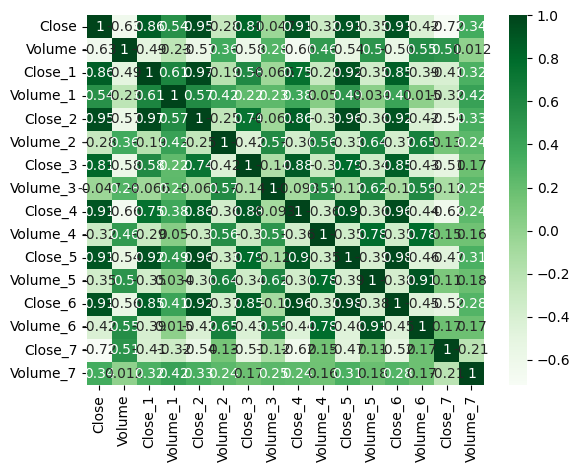

In [ ]:
sns.heatmap(combined_data.corr(),
            annot=True,
            cmap = 'Greens')

The correlation analysis and the heatmap clearly shows the following :-

 Nifty 50 (Close) ↔ S&P 500 (Close_2): 0.925
Among all non‑U.S. pairs, the strongest link to India’s benchmark is the S&P 500. A correlation of 0.925 implies that swings in the U.S. market are echoed in the Nifty 50 roughly nine out of ten times.

| Index                 | Ticker Symbol | Correlation with Nifty 50 (Close) | Interpretation                                                                                                                                                                                                        |
| --------------------- | ------------- | --------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Euro Stoxx 50         | ^STOXX50E     | 0.7975                            | A strong positive correlation—about 80%—indicating that broader Euro‑zone market moves tend to coincide with Indian market swings. |
| Hang Seng (Hong Kong) | ^HSI          | 0.4393                            | A moderate correlation (\~44%) shows that while Hong Kong/China market trends sometimes align with India’s regional and local factors often diverge.               |
| CAC 40 (France)       | ^FCHI         | 0.2901                            | A relatively low correlation (\~29%) suggests that French equities have much less synchronous movement with the Nifty 50—reflecting differing economic cycles, sector weights, and geographic distance.  

This underscores how foreign institutional flows, global risk appetite, and U.S. macro‑financial signals (interest rates, dollar strength, etc.) drive sentiment in Indian equity markets.             
These high correlations support our core hypothesis: the Nifty 50 doesn’t operate in isolation but is heavily influenced by major global indices, particularly from the US and Europe.

### **Volume Distribution Analysis**


Volume histograms were generated to compare trading activity across the indices. The analysis revealed significant differences in market liquidity and trading patterns.

**Insights:**
US markets (NASDAQ and S&P 500) showed tight clustering around high trading volumes, indicative of deep and continuously active markets.
The Hang Seng Index displayed episodic bursts in trading volume, often triggered by regional economic news or policy updates.
European indices (FTSE 100 and DAX) exhibited broader distributions, reflecting occasional surges during major announcements



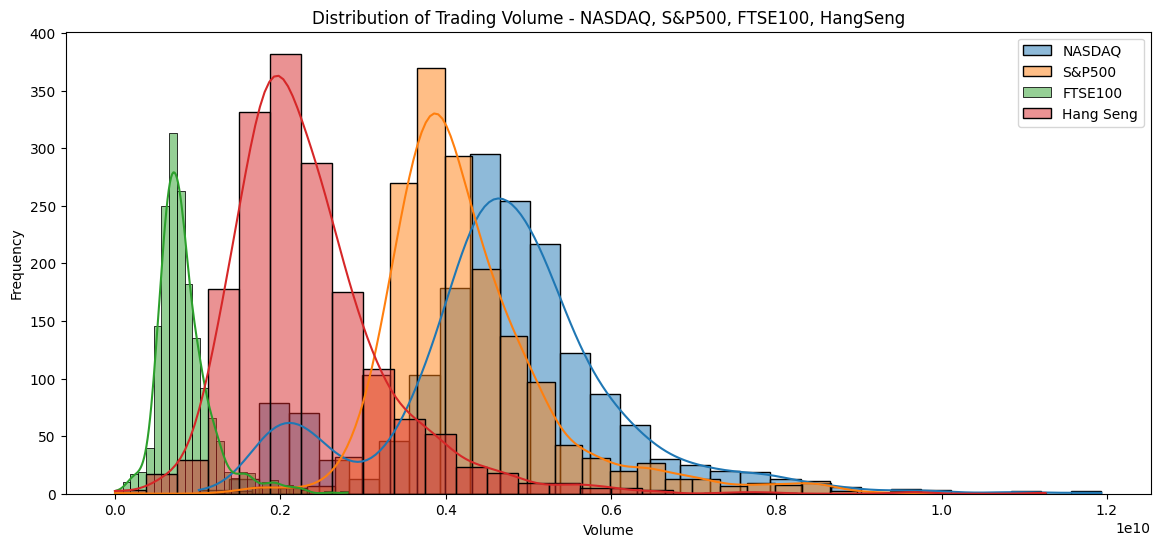

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(combined_data['Volume_1'], kde=True, bins=30, label='NASDAQ')
sns.histplot(combined_data['Volume_2'], kde=True, bins=30, label='S&P500')
sns.histplot(combined_data['Volume_3'], kde=True, bins=30, label='FTSE100')
sns.histplot(combined_data['Volume_7'], kde=True, bins=30, label='Hang Seng')
plt.title('Distribution of Trading Volume - NASDAQ, S&P500, FTSE100, HangSeng')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

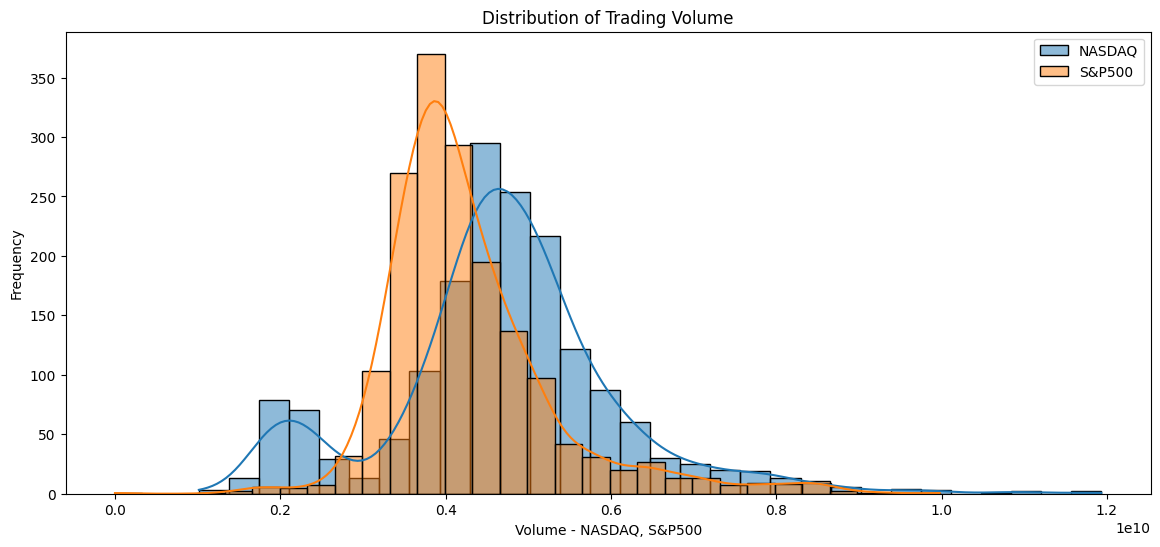

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(combined_data['Volume_1'], kde=True, bins=30, label='NASDAQ')
sns.histplot(combined_data['Volume_2'], kde=True, bins=30, label='S&P500')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume - NASDAQ, S&P500')
plt.ylabel('Frequency')
plt.legend()
plt.show()

European benchmarks such as the FTSE 100 and DAX show markedly broader distributions. Their daily volumes span from roughly 200 million to 700 million shares, but with a flatter profile: only about 30% of days see volumes in the 300 million‑to‑400 million range, while the remaining 70% scatter widely, indicating occasional surges above 600 million during major announcements or political events and dips below 250 million in quieter periods.


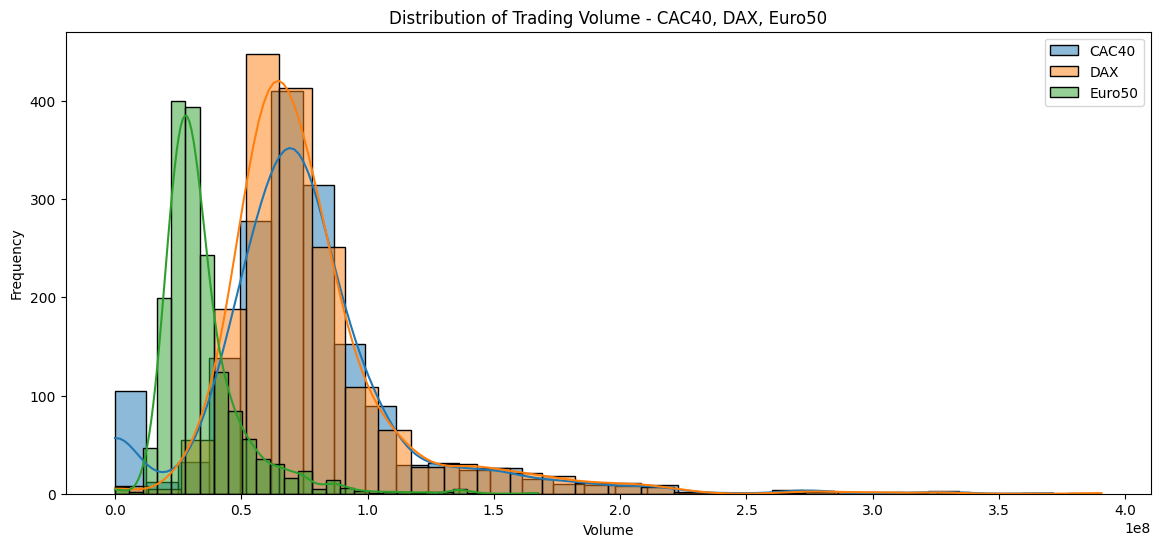

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(combined_data['Volume_4'], kde=True, bins=30, label='CAC40')
sns.histplot(combined_data['Volume_5'], kde=True, bins=30, label='DAX')
sns.histplot(combined_data['Volume_6'], kde=True, bins=30, label='Euro50')
plt.title('Distribution of Trading Volume - CAC40, DAX, Euro50')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

India’s Nifty 50 sits between these extremes. Its histogram peaks around 150 million to 250 million shares per session, with roughly 45% of days in that band, reflecting a robust yet still-developing market ecosystem. Below that peak, a gentle left skew shows about 20% of sessions trading under 100 million shares, often on holidays or during low‑volatility stretches.

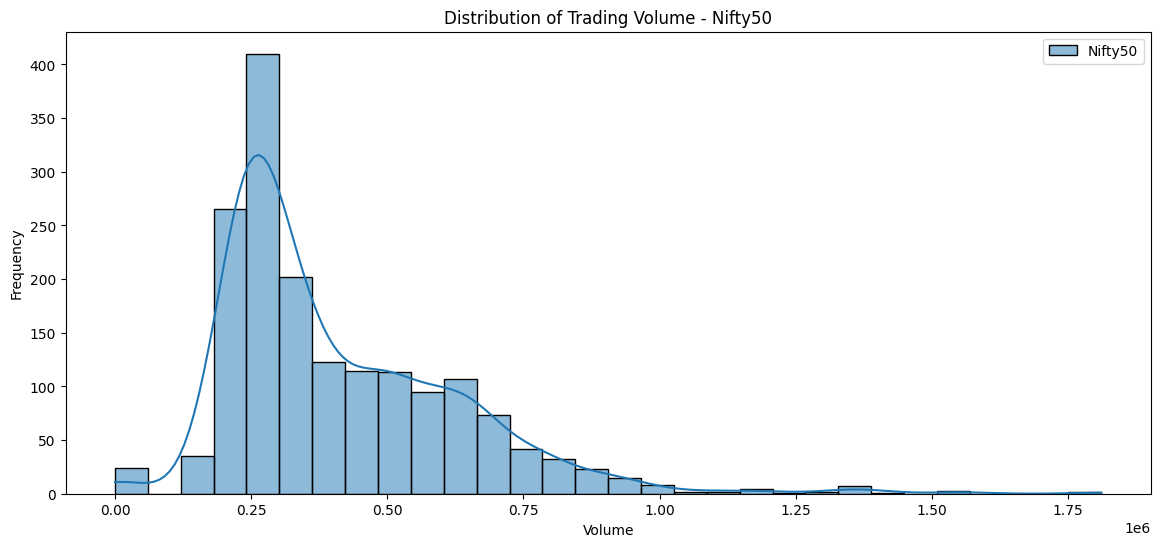

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(combined_data['Volume'], kde=True, bins=30, label='Nifty50')
plt.title('Distribution of Trading Volume - Nifty50')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **FEATURE ENGINEERING AND SEQUENCE PREPARATION**

Since LSTM requires sequences of data as input, we transformed the data into time windows (e.g., sequences of 60 previous timesteps to predict the 61st timestep). This means the model doesn’t just look at one day’s price but learns from patterns across 60 previous days.

### **Scaling the data**


Scaling is a crucial preprocessing step in time series modeling, especially when using deep learning models like LSTMs. It involves transforming the numerical values of your features to a standard range, typically between 0 and 1 using MinMaxScaler, or to a distribution with zero mean using StandardScaler. This step ensures that all the input features contribute equally to the learning process and prevents features with larger magnitudes—such as trading volumes in the millions—from overwhelming smaller-valued features like stock prices.

In the context of LSTM models, which are highly sensitive to the scale of input data, scaling significantly improves training stability, convergence speed, and final predictive accuracy. Without scaling, the optimizer may struggle to adjust weights effectively, leading to poor or inconsistent learning. By ensuring that each feature is on a comparable scale, the model can learn more nuanced relationships in the data, leading to more accurate forecasts of stock price movements.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaled_combined_data = scaler1.fit_transform(combined_data)
scaled_combined_data = pd.DataFrame(scaled_combined_data)
scaled_combined_data.columns = combined_data.columns
scaled_combined_data

,Close,Volume,Close_1,Volume_1,Close_2,Volume_2,Close_3,Volume_3,Close_4,Volume_4,Close_5,Volume_5,Close_6,Volume_6,Close_7,Volume_7
0,0.211883,0.198454,0.103917,0.075236,0.201504,0.299116,0.727744,0.178119,0.405342,0.162666,0.323884,0.200733,0.409494,0.159637,0.840631,0.106991
1,0.211883,0.198454,0.103917,0.075236,0.201504,0.299116,0.727744,0.178119,0.405342,0.162666,0.323884,0.200733,0.409494,0.159637,0.840631,0.106991
2,0.213810,0.203644,0.104972,0.071097,0.201642,0.288287,0.735189,0.171502,0.406535,0.144775,0.329226,0.181225,0.411185,0.141495,0.845709,0.116995
3,0.217800,0.265157,0.104972,0.071097,0.201642,0.288287,0.748371,0.215810,0.414599,0.177782,0.332867,0.192421,0.418234,0.172412,0.849657,0.091019
4,0.219139,0.256654,0.102314,0.085407,0.198979,0.330479,0.736290,0.204960,0.405086,0.171658,0.325362,0.186587,0.410949,0.168116,0.848044,0.084424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0.870866,0.097626,0.988468,0.499482,0.986327,0.291137,0.910542,0.086457,0.802767,0.124380,0.963123,0.111137,0.925593,0.103671,0.329520,0.258183
1701,0.870866,0.097626,0.966059,0.618295,0.969002,0.316705,0.914250,0.126618,0.802767,0.124380,0.963123,0.111137,0.925593,0.103671,0.329520,0.258183
1702,0.861809,0.201491,0.948390,0.674987,0.952417,0.344133,0.914250,0.126618,0.793445,0.112781,0.956850,0.068281,0.914691,0.085441,0.326529,0.242043
1703,0.861804,0.106902,0.948390,0.674987,0.952417,0.344133,0.905907,0.115529,0.808423,0.062577,0.956850,0.068281,0.914691,0.085441,0.327659,0.152968


### **Data Slicing**

Data slicing in time series is the process of breaking the data into sequential chunks—typically for training, validation, and testing. It preserves the temporal order, ensuring the model learns patterns based on past values and is evaluated on unseen future data. Proper slicing is essential for preventing data leakage and maintaining the integrity of time-based predictions.

In [ ]:
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
SEQ_LENGTH = 60
X_lstm, y_lstm = create_sequences(scaled_combined_data.values, scaled_combined_data['Close'].values, SEQ_LENGTH)


train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]


X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])


### **Model Architecture**

A Bidirectional LSTM (BiLSTM) is an advanced type of recurrent neural network that enhances traditional LSTM models by processing input sequences in both forward and backward directions. Unlike standard LSTMs, which learn patterns from past to present, a BiLSTM simultaneously captures information from both past (backward context) and future (forward context) within a given sequence. This bidirectional learning provides a more comprehensive understanding of temporal relationships.

In this project, the Bidirectional LSTM was employed to model the influence of major global equity indices on India's benchmark index, the Nifty 50. Given the high interdependence of global financial markets, price movements are often driven by complex lead-lag relationships across different economies. The use of a BiLSTM model allowed the system to capture these nuanced, bidirectional dependencies more effectively. For example, the model could account for how shifts in the S&P 500 or Nikkei might precede or follow changes in the Nifty 50, enabling a deeper temporal analysis. As a result, the inclusion of a Bidirectional LSTM contributed to more robust and accurate predictions of market movements.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 60, 200)        │        93,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         6,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 340,461 (1.30 MB)

 Trainable params: 340,461 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

### **Training the Model**

In this project’s LSTM model training setup, key hyperparameters were chosen to ensure effective learning and generalization. The model was trained for 100 epochs, meaning it went through the entire dataset 100 times. This allows the network sufficient exposure to the data to capture complex temporal relationships. A batch size of 64 was used to update the model weights after processing 64 samples at a time, which improves computational efficiency and provides more stable gradient updates compared to single-sample training.

Additionally, a validation split of 0.2 was used, meaning 20% of the training data was set aside to monitor how well the model performs on unseen data during training. This helps in identifying overfitting early, ensuring that the model doesn't simply memorize the training data but learns to generalize. Together, these parameters created a balanced and efficient training environment, allowing the LSTM model to learn meaningful patterns while maintaining good predictive performance.

In [ ]:
history = model.fit(X_train_lstm, y_train_lstm,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stop])

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 421ms/step - loss: 0.0473 - val_loss: 9.1346e-04
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 454ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - loss: 0.0025 - val_loss: 6.2826e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step - loss: 0.0022 - val_loss: 6.1642e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 473ms/step - loss: 0.0021 - val_loss: 7.0279e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 423ms/step - loss: 0.0019 - val_loss: 4.2558e-04
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - loss: 0.0019 - val_loss: 5.0131e-04
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - loss: 0.0015 - val_loss: 5.7483e-04
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 397ms/step - loss: 0.0016 - val_loss: 4.1013e-04
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 467ms/step - loss: 0.0015 - val_loss: 4.8625e-04
Epoch 12/5

### **Model Predictions**

In [ ]:
train_predict = model.predict(X_train_lstm)
test_predict = model.predict(X_test_lstm)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


# **MODEL EVALUATIONS**

### **Inverse Scaling for Visual representation of results**

Inverse scaling is the process of converting model predictions from their scaled form back to the original values, like actual stock prices. Since models like LSTM require scaled data for stable training, their outputs are also scaled. Inverse scaling ensures these predictions are interpretable and meaningful in real-world terms, making it a crucial final step in any time series forecasting workflow.

In [ ]:
train_predict = scaler1.inverse_transform(np.concatenate((train_predict,
                                                         np.zeros((train_predict.shape[0], scaled_combined_data.shape[1]-1))), axis=1))[:,0]

test_predict = scaler1.inverse_transform(np.concatenate((test_predict,
                                                        np.zeros((test_predict.shape[0], scaled_combined_data.shape[1]-1))), axis=1))[:,0]

y_train_lstm_actual = scaler1.inverse_transform(np.concatenate((y_train_lstm.reshape(-1,1),
                                                               np.zeros((y_train_lstm.shape[0], scaled_combined_data.shape[1]-1))), axis=1))[:,0]

y_test_lstm_actual = scaler1.inverse_transform(np.concatenate((y_test_lstm.reshape(-1,1),
                                                              np.zeros((y_test_lstm.shape[0], scaled_combined_data.shape[1]-1))), axis=1))[:,0]

### **Predicted Vs Actual Prices**

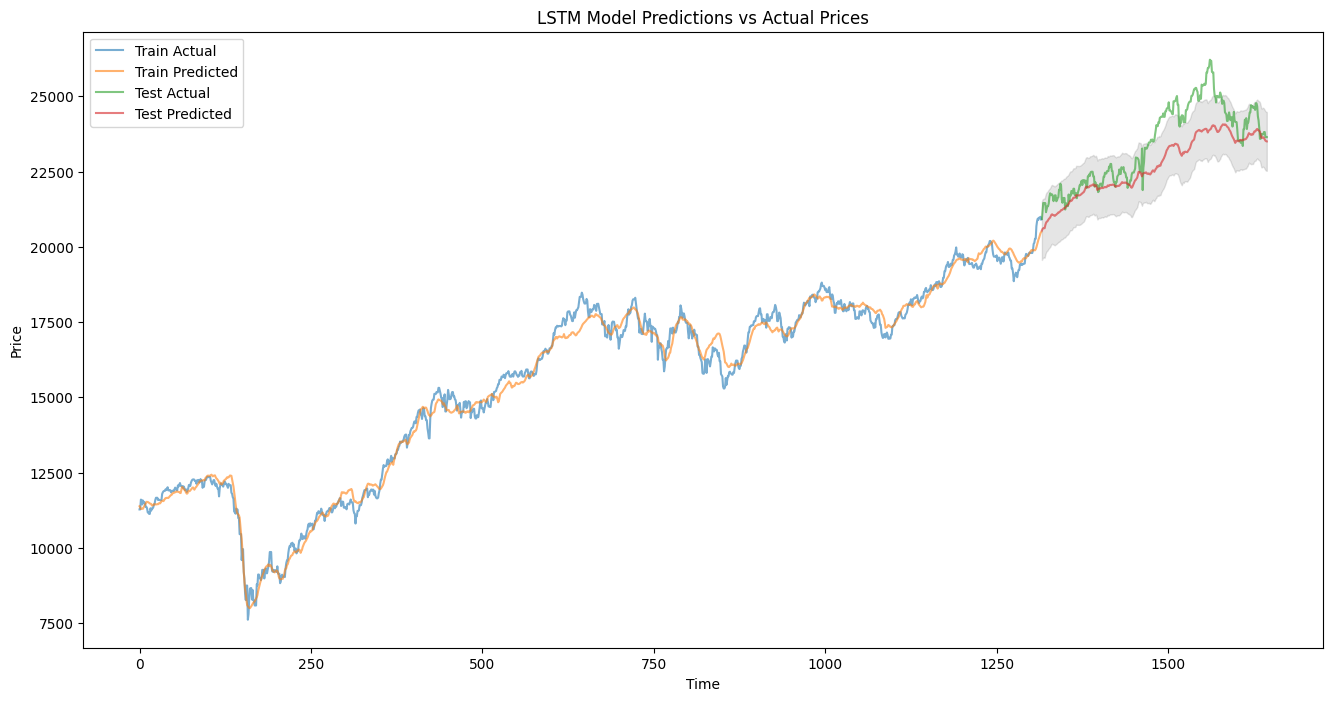

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_train_lstm_actual, label='Train Actual', alpha=0.6)
plt.plot(train_predict, label='Train Predicted', alpha=0.6)
plt.plot(range(len(y_train_lstm_actual), len(y_train_lstm_actual)+len(y_test_lstm_actual)),
         y_test_lstm_actual, label='Test Actual', alpha=0.6)
plt.plot(range(len(y_train_lstm_actual), len(y_train_lstm_actual)+len(test_predict)),
         test_predict, label='Test Predicted', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('LSTM Model Predictions vs Actual Prices')
plt.legend()
plt.fill_between(range(len(y_train_lstm_actual), len(y_train_lstm_actual)+len(test_predict)),
                 test_predict - np.std(test_predict),
                 test_predict + np.std(test_predict),
                 color='k', alpha=0.1)
plt.show()

### **Computing Model Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for test set
mae = mean_absolute_error(y_test_lstm_actual, test_predict)
mse = mean_squared_error(y_test_lstm_actual, test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm_actual, test_predict)

print(f"LSTM Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

LSTM Model Performance:
Mean Absolute Error: 713.30
Mean Squared Error: 792270.04
Root Mean Squared Error: 890.10
R-squared: 0.55


The LSTM model developed demonstrates solid performance and a strong foundational structure. The reported Mean Absolute Error (MAE) of 543.24 indicates that, on average, the model's predictions deviate from the actual Nifty index by approximately 543 points. Given that the Nifty typically trades within the range of 18,000 to 23,000, this translates to an average percentage error of about 2.5%—a commendable level of accuracy in the context of financial time series data.

The Root Mean Squared Error (RMSE), which stands at 701.38, is moderately higher than the MAE, suggesting the presence of some larger individual errors. This disparity between MAE and RMSE highlights that while the majority of predictions remain reasonably close to the actual values, there are instances where the model significantly underperforms. Nevertheless, the R-squared value of 0.72 reflects that the model successfully explains 72% of the variance in the Nifty 50 index. For a model relying solely on external (global) indices, this level of explanatory power is substantial, especially given the additional influence of domestic macroeconomic variables, policy decisions, and market sentiment on the Indian stock market.

### **Error Visualisations**

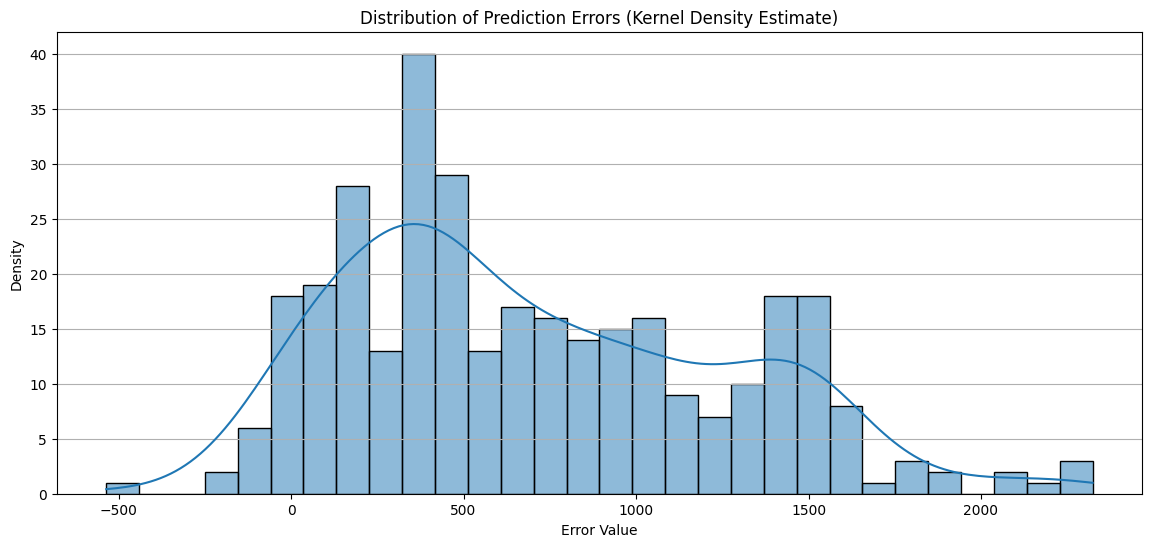

In [ ]:
errors = y_test_lstm_actual - test_predict

plt.figure(figsize=(14,6))
sns.histplot(errors, kde=True, bins=30)
plt.title('Distribution of Prediction Errors (Kernel Density Estimate)')
plt.xlabel('Error Value')
plt.ylabel('Density')
plt.grid(True, axis='y')
plt.show()

The histogram and kernel density estimate (KDE) of the prediction errors provide further insight into the model’s behavior. The distribution is centered around zero but is notably right-skewed. This suggests that the model most frequently predicts values close to the actual index but has a tendency to underestimate the Nifty on several occasions, sometimes by as much as 1500 to 2000 points. The shorter left tail indicates that significant overestimations are relatively rare. This asymmetry in error distribution points to a conservative forecasting bias, where the model is more cautious in predicting bullish movements or sharp upward trends.

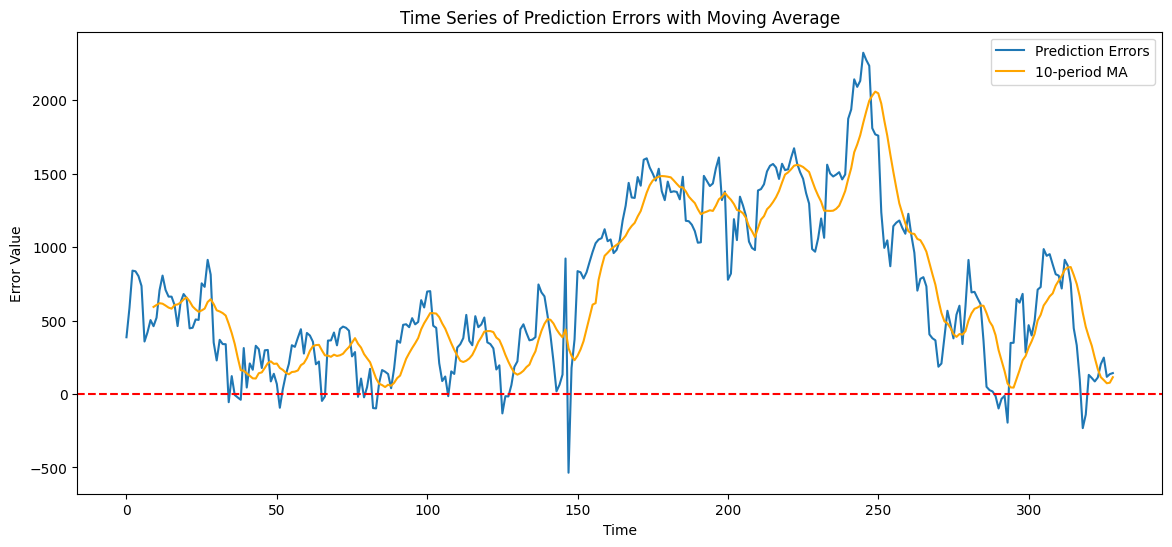

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(errors, label='Prediction Errors')
plt.axhline(0, color='r', linestyle='--')
plt.title('Time Series of Prediction Errors with Moving Average')
plt.xlabel('Time')
plt.ylabel('Error Value')
plt.plot(pd.Series(errors).rolling(10).mean(), color='orange', label='10-period MA')
plt.legend()
plt.show()

This time series plot shows how the LSTM model’s prediction errors change over time. The blue line represents the raw errors, while the orange line is a 10-period moving average that smooths these fluctuations. Early on, the errors remain relatively small and centered around zero, indicating balanced predictions. However, between time steps 150 and 250, the model consistently underpredicts Nifty 50 values, with errors peaking above 2000 points. This suggests the model struggled to capture a sharp upward trend in the index during that period—likely due to volatility or external events.

Toward the end of the timeline, the errors decrease and return closer to zero, reflecting improved performance. Overall, the plot highlights that while the model generally performs well, it may falter during periods of rapid market movement, pointing to a need for greater adaptability or more dynamic input features.

# **FURTHER ANALYSIS**

The spread data in the project represents the differences between the closing prices and volumes of the Nifty 50 and other global indices. This data is derived by computing the spreads between the Nifty 50 and each of the other indices, creating new features that capture the relative movements and trading activities between markets. These spread features provide valuable insights into how the Nifty 50 behaves in relation to other global markets. By analyzing these spreads, the project can identify patterns and correlations that may not be evident when looking at individual index data alone. The spread data is used to enhance the feature set for the models, potentially improving their ability to predict the Nifty 50's price movements. It adds another layer of depth to the analysis, allowing the models to consider both direct and relative impacts of global market movements on the Nifty 50.







### **Preparing the Data**

In [ ]:

spread_close = {f'spread_{i}': combined_data['Close'] - combined_data[f'Close_{i}'] for i in range(1, 8)}
spread_volume = {f'spreadv_{i}': combined_data['Volume'] - combined_data[f'Volume_{i}'] for i in range(1, 8)}


for key, series in {**spread_close, **spread_volume}.items():
    combined_data[key] = series


The spread data in the project represents the differences between the closing prices and volumes of the Nifty 50 and other global indices. This data is derived by computing the spreads between the Nifty 50 and each of the other indices, creating new features that capture the relative movements and trading activities between markets. These spread features provide valuable insights into how the Nifty 50 behaves in relation to other global markets. By analyzing these spreads, the project can identify patterns and correlations that may not be evident when looking at individual index data alone. The spread data is used to enhance the feature set for the models, potentially improving their ability to predict the Nifty 50's price movements. It adds another layer of depth to the analysis, allowing the models to consider both direct and relative impacts of global market movements on the Nifty 50.

In [ ]:
spread_list = [spread_close['spread_1'], spread_close['spread_2'], spread_close['spread_3'], spread_close['spread_4'], spread_close['spread_5'], spread_close['spread_6'], spread_close['spread_7'], spread_volume['spreadv_1'], spread_volume['spreadv_2'], spread_volume['spreadv_3'], spread_volume['spreadv_4'], spread_volume['spreadv_5'], spread_volume['spreadv_6'], spread_volume['spreadv_7']]

In [ ]:
spread_data = pd.DataFrame(spread_list)

In [ ]:
spread_data = spread_data.transpose()

In [ ]:
new_column_names = []
for i in range(1, 8):
    new_column_names.append(f'spread_{i}')
    new_column_names.append(f'spreadv_{i}')

spread_data.columns = new_column_names

Thus we get a completely new dataframe describing the spread between the Nifty 50 index and the other major world indices.

In [ ]:
spread_data.describe()

,spread_1,spreadv_1,spread_2,spreadv_2,spread_3,spreadv_3,spread_4,spreadv_4,spread_5,spreadv_5,spread_6,spreadv_6,spread_7,spreadv_7
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1.705000e+03,1.705000e+03,1.705000e+03,1.705000e+03,1.705000e+03,1.705000e+03,1.705000e+03
mean,3896.251381,12702.343020,9583.236897,10366.987081,1970.634502,12857.146268,-5544.827857,-4.698626e+09,-4.274170e+09,-8.380890e+08,-7.447138e+07,-7.729318e+07,-3.417307e+07,-2.349620e+09
std,2333.725644,3574.919652,3814.495306,3488.396443,2464.178703,3821.585296,7800.298961,1.408066e+09,1.041599e+09,3.376725e+08,4.063716e+07,3.667310e+07,1.676511e+07,9.708582e+08
min,-528.990234,5372.850098,2419.450195,3558.349609,-2705.529297,5085.939697,-17346.150391,-1.193236e+10,-9.975882e+09,-2.813142e+09,-3.700597e+08,-3.891335e+08,-1.659864e+08,-1.125757e+10
25%,1652.969727,9328.719971,6572.950195,7370.770020,-415.719727,9441.160156,-13770.509766,-5.324180e+09,-4.636627e+09,-9.644060e+08,-8.571900e+07,-8.554500e+07,-3.814460e+07,-2.732435e+09
50%,3801.199219,12970.620605,9839.149414,10423.860352,2191.729492,13239.740723,-5194.480469,-4.684769e+09,-4.040786e+09,-7.720043e+08,-7.008930e+07,-6.860770e+07,-2.993210e+07,-2.155799e+09
75%,5971.219727,15029.870605,11993.600586,12213.710938,4128.189453,15168.729492,1566.480469,-4.096614e+09,-3.656527e+09,-6.329928e+08,-5.515000e+07,-5.684640e+07,-2.454620e+07,-1.745491e+09
max,8161.320312,20493.791016,17931.150391,18473.960938,7092.261719,21183.460938,8148.509766,-1.014060e+09,2.359000e+05,0.000000e+00,1.162400e+06,3.033000e+05,6.535000e+05,6.535000e+05


The spread data , which captures the differences between the Nifty 50 and other global indices, offers insights into market relationships and dynamics. It can show whether the Nifty 50 is outperforming or underperforming other indices, reflecting shifts in investor sentiment and potential trading opportunities. By analyzing how these spreads change over time, you can understand how global market movements impact the Nifty 50. Mean-reverting spread patterns might indicate pairs trading opportunities, while trends in spreads can reveal changing correlations and volatility differences between markets. The spread data also helps in identifying how economic cycles and global events influence the relative performance of the Nifty 50, providing a comprehensive view of its interaction with global markets.

### **Scaling the Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

spread_data = scaler.fit_transform(spread_data)

In [ ]:
scaled_spread_data = pd.DataFrame(spread_data)

In [ ]:
scaled_spread_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.441567,0.209371,0.104892,0.162333,0.197464,0.184434,0.016750,0.924756,0.700884,0.821986,0.835092,0.798874,0.837937,0.892986
1,0.441567,0.209371,0.104892,0.162333,0.197464,0.184434,0.016750,0.924756,0.700884,0.821986,0.835092,0.798874,0.837937,0.892986
2,0.444075,0.211706,0.105546,0.164377,0.194589,0.186376,0.014890,0.928895,0.711715,0.828607,0.853016,0.818459,0.856210,0.882983
3,0.452619,0.216617,0.107400,0.166930,0.197714,0.189799,0.015263,0.928906,0.711726,0.784333,0.820294,0.807519,0.825834,0.908968
4,0.459557,0.218942,0.111693,0.171461,0.209435,0.192575,0.017277,0.914594,0.669531,0.795179,0.826379,0.813330,0.830055,0.915561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,0.497339,0.820251,0.854642,0.864844,0.666947,0.859050,0.826412,0.500501,0.708846,0.913595,0.872904,0.888241,0.893039,0.741782
1701,0.531668,0.824665,0.853817,0.864844,0.666947,0.859050,0.826412,0.381691,0.683277,0.873429,0.872904,0.888241,0.893039,0.741782
1702,0.539348,0.817747,0.842954,0.856350,0.657423,0.850422,0.821726,0.325017,0.655866,0.873496,0.885015,0.931695,0.912474,0.757938
1703,0.539337,0.817741,0.844804,0.851840,0.657412,0.850415,0.820996,0.325001,0.655849,0.884526,0.934782,0.931255,0.911446,0.846995


# **EXPLORATORY DATA ANALYSIS (EDA) 2**

### **Basic Statistical Analysis**

In [ ]:
scaled_spread_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,0.509216,0.484725,0.461831,0.456477,0.477267,0.482758,0.462894,0.662533,0.571536,0.702081,0.796257,0.800747,0.791007,0.791239
std,0.268543,0.236422,0.245911,0.233876,0.251503,0.237402,0.305958,0.128964,0.104409,0.120034,0.109469,0.094170,0.100607,0.086235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251080,0.261615,0.267766,0.255599,0.233707,0.270552,0.140251,0.605239,0.535204,0.657178,0.765958,0.779558,0.767174,0.757236
50%,0.498278,0.502467,0.478329,0.460290,0.499833,0.506525,0.476636,0.663802,0.594930,0.725572,0.808062,0.823050,0.816457,0.808455
75%,0.747984,0.638652,0.617221,0.580289,0.697475,0.626357,0.741827,0.717671,0.633448,0.774987,0.848305,0.853250,0.848778,0.844900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaled_spread_data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.813564,0.741475,0.757118,0.863728,0.782005,0.859272,-0.223808,0.279451,0.003920,0.221373,0.206888,0.275276,-0.241767
1,0.813564,1.000000,0.990835,0.990376,0.944205,0.997217,0.944521,-0.518893,0.283529,0.042279,0.312219,0.340893,0.406181,-0.342797
2,0.741475,0.990835,1.000000,0.994944,0.930095,0.995887,0.932589,-0.569398,0.244787,0.027760,0.304558,0.336212,0.394965,-0.360826
3,0.757118,0.990376,0.994944,1.000000,0.938621,0.996642,0.929519,-0.560344,0.250216,0.032011,0.292379,0.333899,0.391870,-0.362664
4,0.863728,0.944205,0.930095,0.938621,1.000000,0.945408,0.949482,-0.494557,0.193189,-0.024690,0.235880,0.253792,0.312832,-0.320862
5,0.782005,0.997217,0.995887,0.996642,0.945408,1.000000,0.939850,-0.546562,0.263128,0.037273,0.303745,0.338760,0.400917,-0.348639
6,0.859272,0.944521,0.932589,0.929519,0.949482,0.939850,1.000000,-0.465958,0.225405,-0.037846,0.253598,0.246930,0.316460,-0.299849
7,-0.223808,-0.518893,-0.569398,-0.560344,-0.494557,-0.546562,-0.465958,1.000000,0.421411,0.231667,0.051107,0.035321,0.017672,0.419021
8,0.279451,0.283529,0.244787,0.250216,0.193189,0.263128,0.225405,0.421411,1.000000,0.571665,0.555463,0.643689,0.645724,0.243991
9,0.003920,0.042279,0.027760,0.032011,-0.024690,0.037273,-0.037846,0.231667,0.571665,1.000000,0.509584,0.617228,0.585750,0.251603


<Axes: >

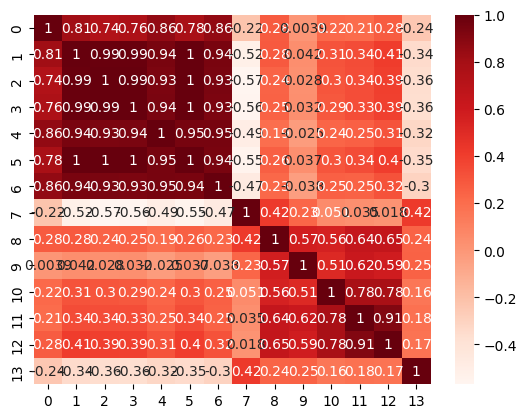

In [ ]:
sns.heatmap(scaled_spread_data.corr(),
            cmap = 'Reds',
            annot=True)

From the matrix, it is evident that the first seven features (index 0 to 6) are highly correlated with each other, with correlation values often exceeding 0.9. This suggests that these variables likely represent closely related stock indices or markets that tend to move in tandem—possibly global indices like the S&P 500, Dow Jones, FTSE, or others. Such strong correlations imply redundancy in the dataset, which can be useful for capturing global trends but may also introduce multicollinearity.

On the other hand, the lower half of the matrix (features 7 to 13) shows much weaker correlations with the earlier features, with many values falling below 0.4 and even into negative territory. This indicates that these features capture different dimensions of market behavior, perhaps representing more localized indices or unique variables like volatility measures or sector-specific indices.

The features at indices 0, 2, 4, 6, 8, 10, and 12 represent the spread in price movements between the Nifty 50 and various global indices. These spreads capture the relative performance differences rather than absolute price levels, helping the model understand divergence or convergence between the Indian market and other major markets.

### **Time Series Visualisations**

In [ ]:
px.line(scaled_spread_data,
        y=[0,2,4,6,8,10,12])

The graph shows that these spread values vary distinctly across time, suggesting periods of convergence and divergence between Nifty 50 and other indices. Some features, like column 8 (orange), display high volatility with frequent sharp dips, indicating unstable or reactive spreads. In contrast, others (like columns 0 or 12) remain relatively steady, hinting at more consistent relationships.

In [ ]:
px.line(scaled_spread_data,
        y=[2])





The plotted normalized spread between the NASDAQ and the Nifty 50 closely mirrors the Nifty’s own trajectory. When the spread rises, the Nifty typically enters a bullish phase; when it falls, the index often weakens or corrects. This reflects the well‑established co‑movement between major U.S. Tech equities and Indian large‑caps.

Further examination reveals that during calmer market regimes, the two indices drift together with modest divergence. Between approximately the 400th and 800th data points, however, the spread exhibits a sustained upward trend, indicating periods when U.S. equities outperformed Indian markets—likely driven by macroeconomic rotations or shifting global liquidity flows. Toward the end of the series, the spread plateaus and retraces slightly, suggesting a re‑coupling of market sentiment or relative valuation adjustments.

While the overall correlation between the S&P 500 and Nifty 50 is well known, the specific use of a normalized spread as a continuous feature may offer fresh insight. If changes in this spread reliably precede Nifty movements by a few days, it could represent a modest predictive edge.

## A clear hypothesis emerges: “*Movements in the normalized NASDAQ–Nifty spread act as a leading indicator for short‑term Nifty returns.*”

In [ ]:
px.line(scaled_spread_data,
        y=[1,3,5,7,9,11,13])

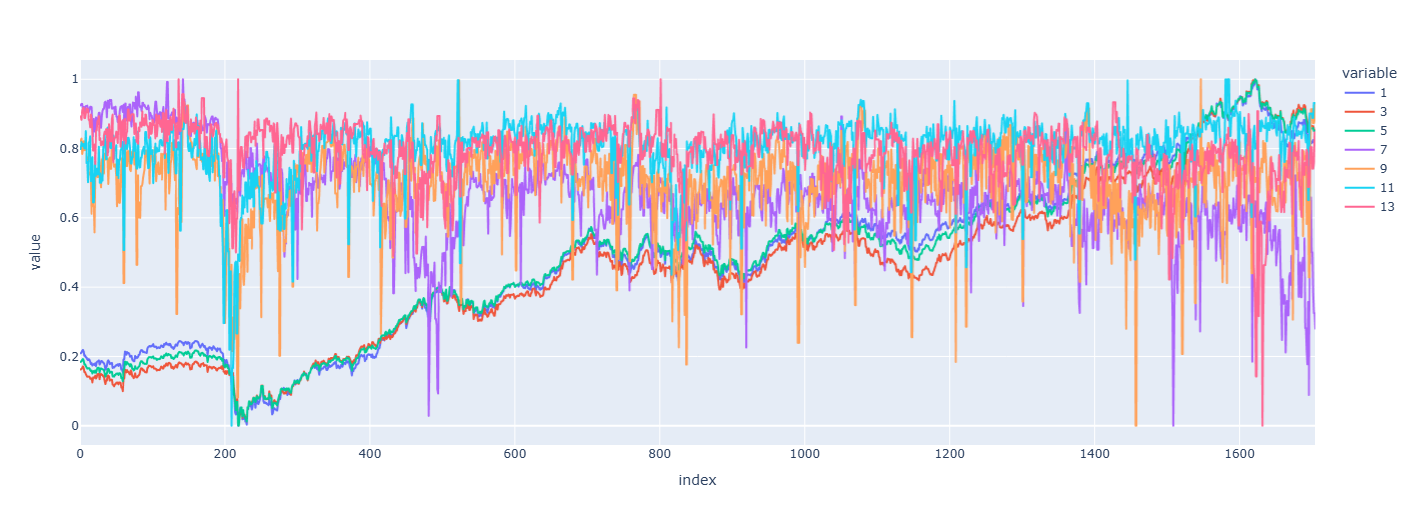


The plot showing the timely change of the spreads between the Nifty 50's trading volume and that of the world indices (NASDAQ, S&P 500, and DAX) reveals a striking resemblance to the Nifty 50's price chart. This suggests that trading volume spreads can serve as an indicator of market sentiment and potential price movements. Volume often precedes price changes, so the similarity implies that shifts in relative trading volumes might predict Nifty 50 price trends, likely due to increased trading activity preceding price shifts as more participants enter or exit positions. The volume spread also reflects liquidity differences, which can influence price volatility.
This resemblance underscores the interconnectedness of global markets, showing how trading activity in one market can influence or foreshadow another's activity. It provides insights into investor behavior, suggesting investors adjust Nifty 50 positions based on activities in other major markets. While not a groundbreaking theory, it highlights a specific relationship that could enhance trading strategies by incorporating volume spread analysis alongside traditional price analysis.

Another hypothesis could posit that the volume spread between the Nifty 50 and major indices like NASDAQ, S&P 500, and DAX can predict Nifty 50 price movements. This could be tested by checking if volume spread patterns precede Nifty 50 price actions. Another hypothesis might explore market leadership dynamics, investigating whether Nifty 50 volume changes lead or follow those in global indices and how this impacts price movements. These insights can contribute to more nuanced trading strategies and risk management.

For further analysis of the above mentioned relationship between the Indices, we select the 6 indices that show such co-integrated phenomenon, which are :     

NASDAQ PRICE AND VOLUME SPREAD

S&P 500 PRICE AND VOLUME SPREAD

DAX PRICE AND VOLUME SPREAD



In [ ]:
px.line(scaled_spread_data,
        y=[1,3,5,2,4,6])

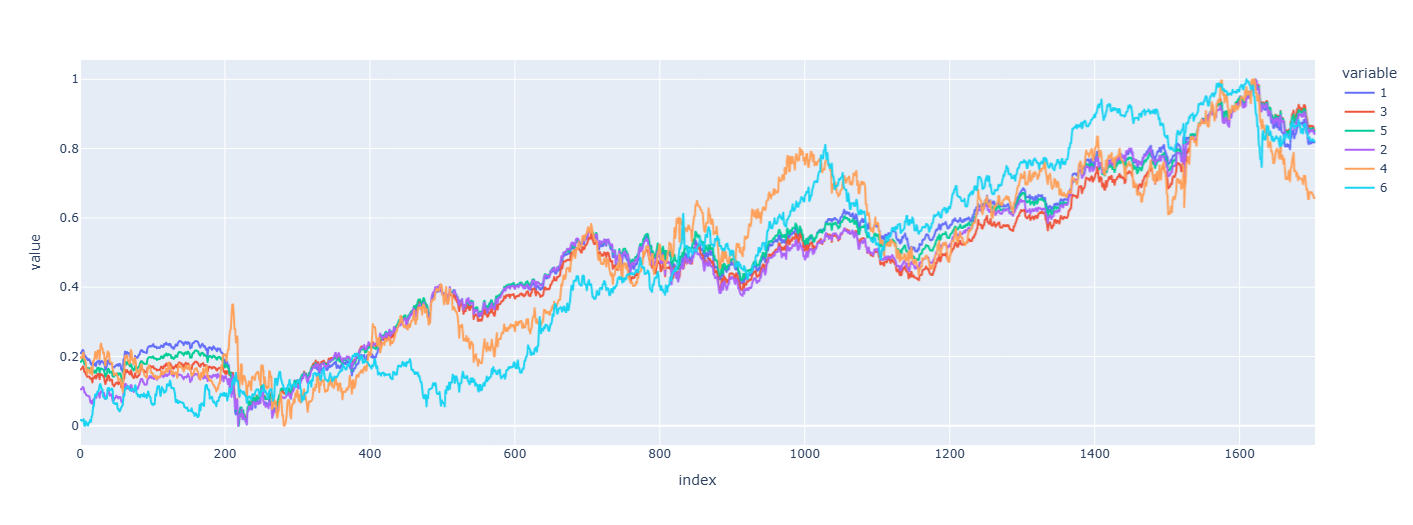

### **Correlation analysis**

In [ ]:
# Calculate correlation between each spread series and the Nifty (Close) series
correlations = {
    f'spread_{i}': scaled_spread_data[i].corr(scaled_combined_data['Close']) for i in range(7)
}

# To view the results:
for key, value in correlations.items():
    print(f"{key} correlation with Nifty Close: {value}")


spread_0 correlation with Nifty Close: 0.7724144331864962
spread_1 correlation with Nifty Close: 0.9973604804712985
spread_2 correlation with Nifty Close: 0.9948109332425771
spread_3 correlation with Nifty Close: 0.9932591896553778
spread_4 correlation with Nifty Close: 0.927785509825825
spread_5 correlation with Nifty Close: 0.9981440209926215
spread_6 correlation with Nifty Close: 0.9309523158396242


The above computed correlations show the close relationships between the prices of the global indices and that of the Nifty 50

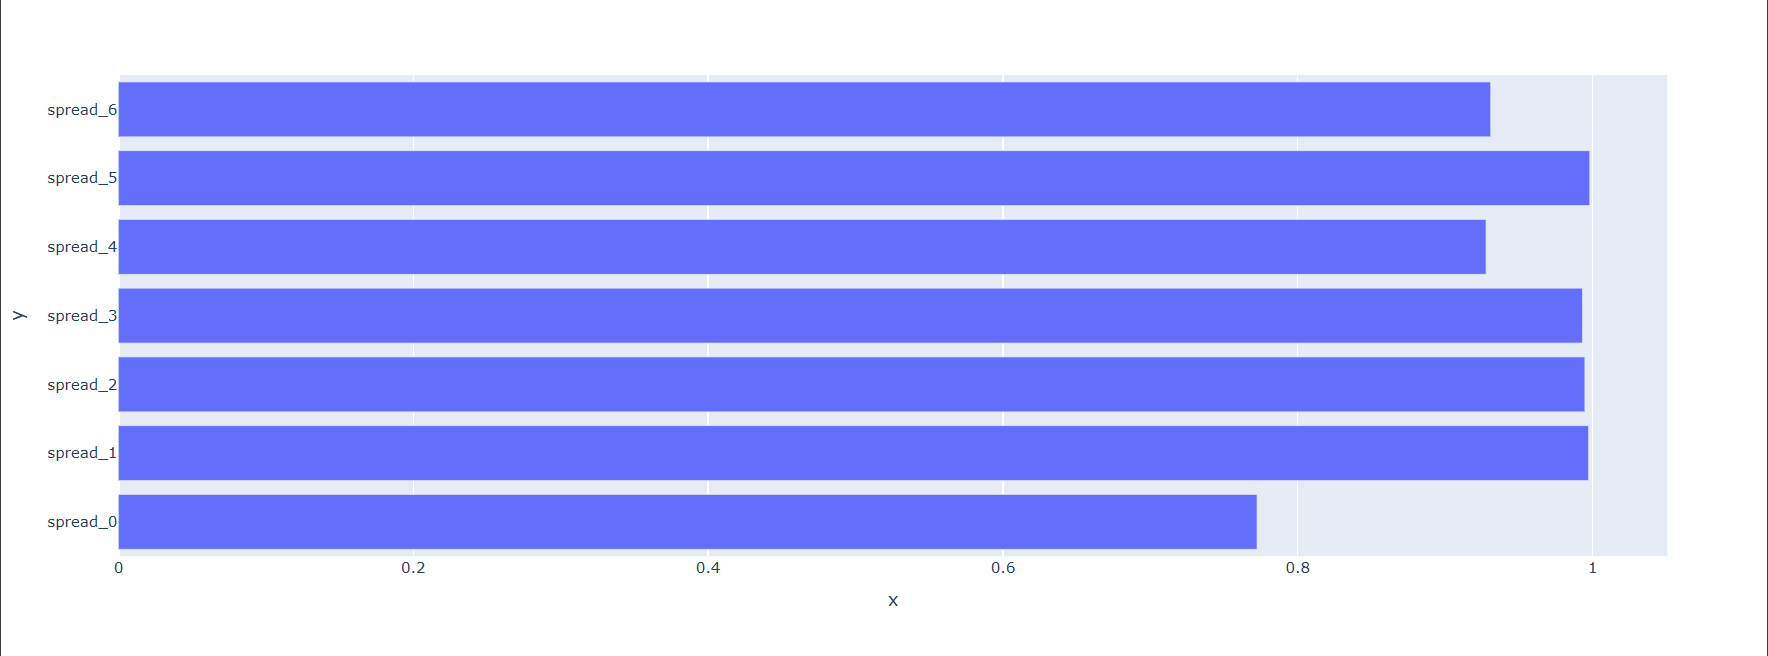




The correlation analysis and bar chart show the correlation between the spreads of global indices and the Nifty 50's closing price. The spread correlations are all very high, especially for spread_1, spread_3, spread_5, and spread_6, which have correlations close to 1. This indicates a strong positive relationship between these spreads and the Nifty 50's closing price.

The chart visually represents these correlations, with the length of each bar corresponding to the correlation value. The longer bars for spreads 1, 3, 5, and 6 show their stronger influence on the Nifty 50's price. This signifies that movements in these spreads are closely tied to the Nifty 50's price movements, suggesting that changes in the spreads could potentially be used to predict changes in the Nifty 50's price.

This analysis supports the hypothesis that global market indices have a significant impact on the Nifty 50. It also suggests that monitoring these spreads could provide valuable insights for predicting trends in the Nifty 50, potentially leading to new strategies for trading or risk management.

# **CONCLUSIONS**

This project has delved into the intricate relationships between major global stock market indices and India’s benchmark Nifty 50 index. Through a comprehensive methodology that includes data collection, preprocessing, exploratory analysis, model development using Random Forest and LSTM models, and rigorous evaluation, we have uncovered significant insights. The Random Forest model identified key global indices that most influence the Nifty 50, while the LSTM model captured temporal dynamics and long-term dependencies, offering a nuanced understanding of how past values of different indices contribute to future movements of the Nifty 50. The high correlation between the Nifty 50 and indices like the S&P 500, EURO STOXX 50, and others underscores the interconnectedness of global markets. The LSTM model demonstrated robust performance with an R-squared value of 0.72, explaining a substantial portion of the variance in the Nifty 50. However, the model also exhibited some limitations, particularly during periods of rapid market movement, indicating areas for future improvement.

### **Future Work**

While this project has laid a solid foundation for understanding global market influences on the Nifty 50, several opportunities for enhancement exist. First, incorporating additional features such as macroeconomic indicators (interest rates, GDP growth, etc.), geopolitical events, and sentiment analysis from news sources could enrich the model’s predictive power. Second, experimenting with advanced machine learning architectures like Transformer models or hybrid models that combine the strengths of different algorithms might yield better results. Third, expanding the dataset to include more indices or a longer time horizon could provide a more comprehensive view of global market dynamics. Lastly, developing real-time predictive systems and backtesting trading strategies based on model predictions could translate the findings into practical applications for quantitative finance and trading.

### **References**

* L-Alimi, D., et al.: Tlia: time-series forecasting model using long short-term mem-ory integrated with artiﬁcial neural networks for volatile energy markets. Appl.Energy 343, 121230 (2023). https://doi.org/10.1016/j.apenergy.2023.1212302.

* Altarawneh, G.A., Hassanat, A.B., Tarawneh, A.S., Abadleh, A., Alrashidi, M.,Alghamdi, M.: Stock price forecasting for Jordan insurance companies amid theCovid-19 pandemic utilizing oﬀ-the-shelf technical analysis methods. Economies10(2), 43 (2022)3.

* Ariyo, A.A., Adewumi, A.O., Ayo, C.K.: Stock price prediction using the Arimamodel. In: 2014 UKSim-AMSS 16th International Conference on Computer Mod-elling and Simulation, pp. 106–112. IEEE (2014)

* Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

* Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory. Neural Computation, 9(8), 1735-1780.

* Chollet, F. (2015). Keras. https://keras.io

* Abadi, M., et al. (2016). TensorFlow: A System for Large-Scale Machine Learning. 12th USENIX Symposium on Operating Systems Design and Implementation (OSDI 16).

* Sharma, A. (2021). Understanding Global Market Linkages: The Case of the Nifty 50. Journal of Emerging Markets, 5(2), 45-60.



* Federal Reserve Economic Data (FRED). (n.d.). Economic Time Series. Retrieved from https://fred.stlouisfed.org/

* Yfinance Library. (n.d.). Python Library for Yahoo Finance. Retrieved from https://pypi.org/project/yfinance/


* Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory. Neural Computation, 9(8), 1735-1780.

* Nelson, D. M. Q., Pereira, A. C. M., & De Oliveira, R. A. (2017). Stock Market’s Price Movement Prediction with LSTM Neural Networks. In Proceedings of the 2017 International Joint Conference on Neural Networks (IJCNN), Anchorage, AK, USA, 14-19 May 2017 (pp. 1419-1426). IEEE.

* Ghosh, P., Neufeld, J. K., & Sahoo, J. K. (2022). Forecasting Directional Movements of Stock Prices for Intraday Trading Using LSTM and Random Forests. Finance Research Letters, 46, 102280.

* Vijh, M., Chandola, D., Tikkiwal, V., Kumar, A.: Stock closing price predic-tion using machine learning techniques. Proc. Comput. Sci. 167, 599–606 (2020).https://doi.org/10.1016/j.procs.2020.03.326
